[ 4.28244273  4.66972656  3.35275075  2.36158676  3.74751768  9.75240814
  5.15756521  4.80213993  5.90145058  1.91271217  4.71273852  2.36241133
  1.61084671  6.71697406  3.11442326  5.15422491  5.09580485  2.11274369
  6.76574344  1.48354695  2.65304672  6.81892055  2.77103106  5.06418788
  5.72517362  3.54313443  5.67858554  1.03222311  1.63983108  5.51107055
  0.65124788  4.97843073  4.32989217  2.28812021  4.51797044  4.52825271
  6.93340533  4.94273792  2.54969132  0.78634279  4.81172184  5.19576022
  6.11967179  3.5235398   0.75307613  4.23428727  7.15230773  2.83345813
  8.60608829  4.27073679  7.75388195  6.79259227  0.62404892  4.26260727
  4.09584051  3.26993383  4.86431429  8.38977374  6.48961063  4.09783105
  4.40498267  3.27433241  7.44164281  7.62286463  3.21797707  4.42538064
  7.06135769  3.94733606  1.91385988  5.23226903  3.61125312  1.86866663
  5.71568321  2.50687193  2.26842535  3.75523264  0.71738199  8.02274291
  2.46995812  5.35222504  2.72716235  4.15793385  5

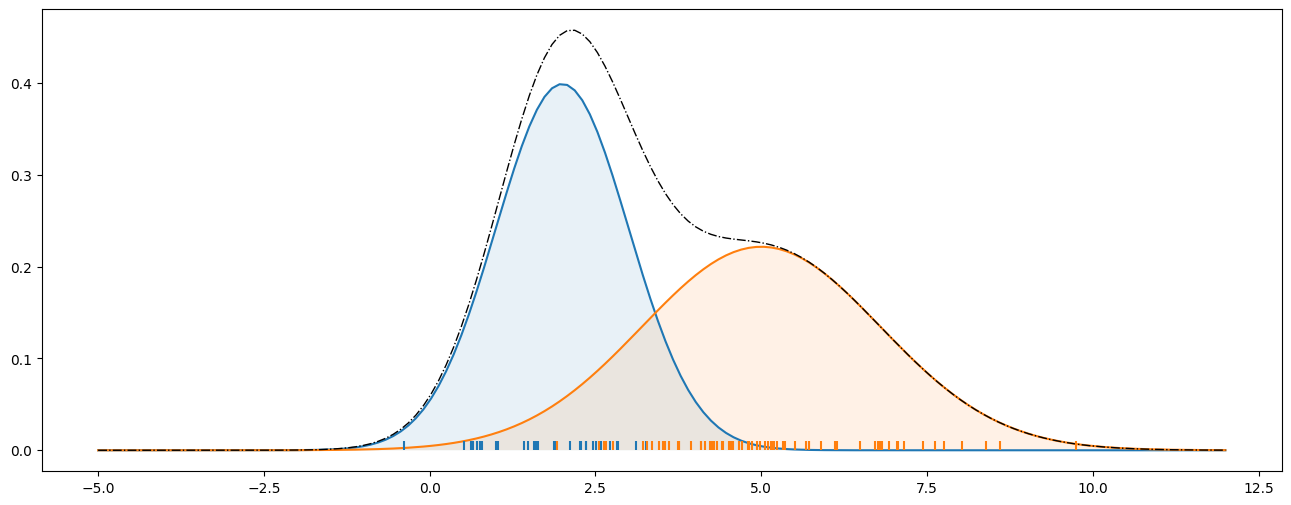

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

np.random.seed(654)
# Draw samples from two Gaussian w.p. z_i ~ Bernoulli(phi)
generative_m = np.array([stats.norm(2, 1), stats.norm(5, 1.8)])
z_i = stats.bernoulli(0.75).rvs(100)
x_i = np.array([g.rvs() for g in generative_m[z_i]])
print(x_i)
print(x_i.shape)

# plot generated data and the latent distributions
x = np.linspace(-5, 12, 150)

plt.figure(figsize=(16, 6))
plt.plot(x, generative_m[0].pdf(x))
plt.plot(x, generative_m[1].pdf(x))
plt.plot(x, generative_m[0].pdf(x) + generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx(generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(generative_m[1].pdf(x), x, alpha=0.1)
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[z_i])


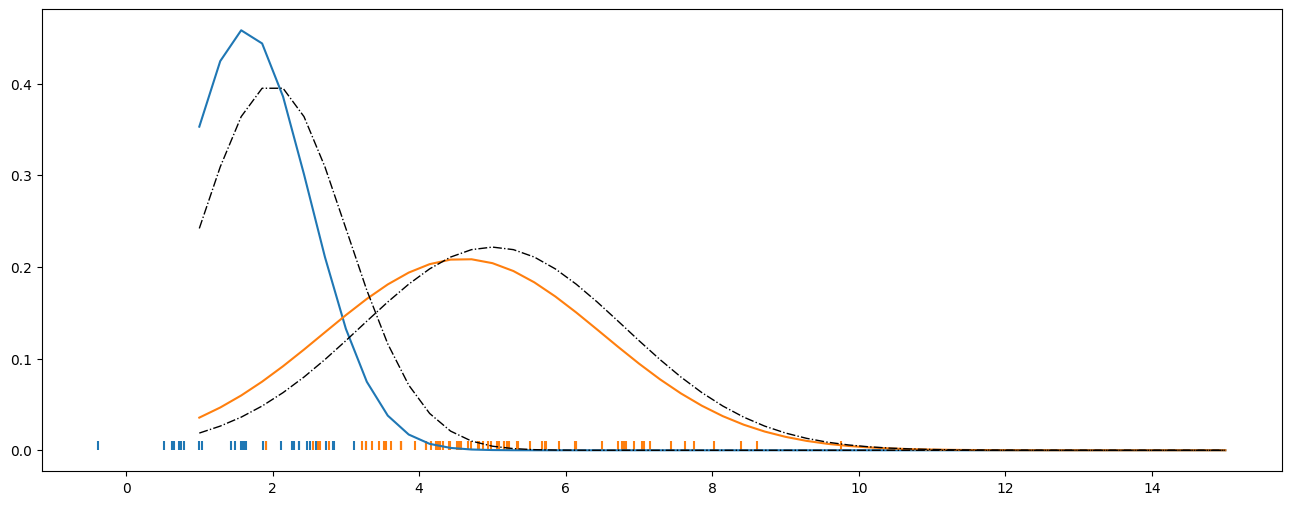

In [9]:
class EM:
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.std = np.ones(k)
        self.w_ij = None
        self.phi = np.ones(k) / k

    def expectation_step(self, x):
        for z_i in range(self.k):
            self.w_ij[z_i] = stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) * self.phi[z_i]
        # normalize so that marginalizing z would lead to p = 1
        self.w_ij /= self.w_ij.sum(0)

    def maximization_step(self, x):
        self.phi = self.w_ij.mean(1)
        self.std = ((self.w_ij * (x - self.mu[:, None])**2).sum(1) / self.w_ij.sum(1))**0.5
        self.mu = (self.w_ij * x).sum(1) / self.w_ij.sum(1)
        

    def fit(self, x):
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.w_ij = np.zeros((self.k, x.shape[0]))

        last_mu = np.ones(self.k) * np.inf
        while not np.all(np.isclose(self.mu, last_mu)):
            last_mu = self.mu
            self.expectation_step(x)
            self.maximization_step(x)

m = EM(2)
m.fit(x_i)
fitted_m = [stats.norm(mu, std) for mu, std in zip(m.mu, m.std)]

plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[z_i])
plt.plot(x, fitted_m[0].pdf(x))
plt.plot(x, fitted_m[1].pdf(x))
plt.plot(x, generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, generative_m[1].pdf(x), color='black', lw=1, ls='-.')

Text(0, 1.7400900355430744, '$E[f(x)])$')

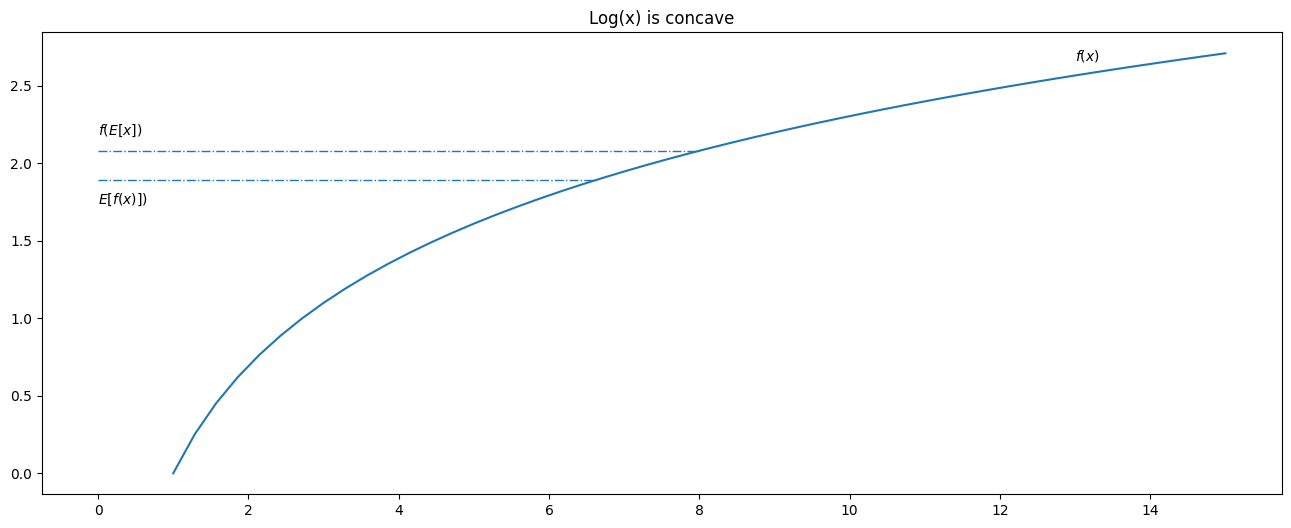

In [8]:
x = np.linspace(1, 15)

plt.figure(figsize=(16, 6))
plt.title('Log(x) is concave')
plt.plot(x, np.log(x))
plt.annotate(r'$f(x)$', (13, np.log(13) + 0.1))

plt.hlines(np.log(np.mean(x)), 0, np.mean(x), linestyles='-.', lw=1)
plt.annotate(r'$f(E[x])$', (0, np.log(np.mean(x)) + 0.1))

plt.hlines(np.mean(np.log(x)), 0, np.exp(np.mean(np.log(x))), linestyles='-.', lw=1)
plt.annotate(r'$E[f(x)])$', (0, np.mean(np.log(x)) - 0.15))